In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.shape

(13200, 7)

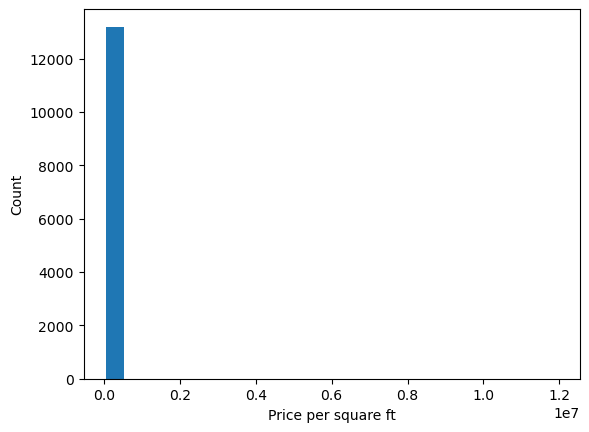

In [4]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

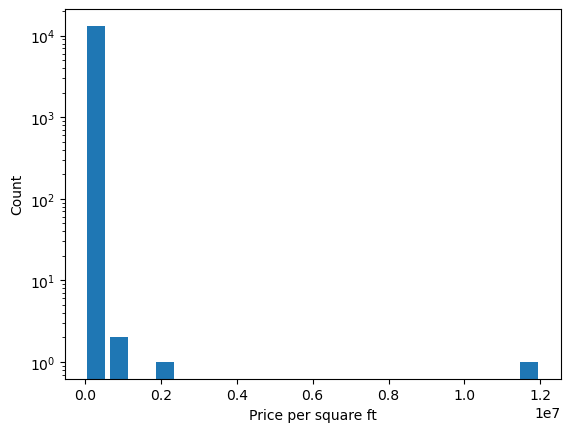

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

## using percentile

In [6]:
min_threshold = df['price_per_sqft'].quantile(0.001)
max_threshold = df['price_per_sqft'].quantile(0.999)

In [7]:
df2 = df[(df['price_per_sqft']>min_threshold) & (df['price_per_sqft']<max_threshold)]
df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6550,other,3 BHK,1550.0,3.0,59.00,3,3806
5363,Uttarahalli,2 BHK,1125.0,2.0,47.00,2,4177
9414,other,1 Bedroom,1500.0,1.0,300.00,1,20000
1413,other,2 BHK,1015.0,2.0,45.00,2,4433
1138,Kodigehaali,2 BHK,1117.0,2.0,56.00,2,5013
10895,Kammasandra,4 Bedroom,1200.0,6.0,60.00,4,5000
9284,Whitefield,4 Bedroom,2900.0,4.0,225.00,4,7758
9577,Raja Rajeshwari Nagar,3 BHK,1529.0,3.0,51.77,3,3385
5985,Rajaji Nagar,4 BHK,3730.0,4.0,370.00,4,9919
4163,Tumkur Road,3 BHK,1500.0,3.0,100.00,3,6666


In [8]:
df2.shape

(13172, 7)

In [9]:
df.shape[0] - df2.shape[0]

28

In [10]:
df2['price_per_sqft'].std()

4141.020700174605

## using standard deviation

In [11]:
upper_limit = df2.price_per_sqft.mean() + 4 * df2.price_per_sqft.std()
upper_limit

23227.73653589429

In [12]:
lower_limit = df2.price_per_sqft.mean() - 4 * df2.price_per_sqft.std()
lower_limit

-9900.429065502549

In [21]:
df2[(df2['price_per_sqft']<lower_limit) | (df2['price_per_sqft']>upper_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4350,other,5 Bedroom,1750.00,5.0,450.0,5,25714
3605,other,4 Bedroom,2700.00,6.0,675.0,4,25000
9873,other,3 Bedroom,2400.00,6.0,775.0,3,32291
5315,Banashankari Stage II,4 Bedroom,1500.00,2.0,650.0,4,43333
2632,other,4 Bedroom,2400.00,4.0,700.0,4,29166
12393,Electronic City Phase II,1 BHK,1200.00,1.0,295.0,1,24583
2830,BTM 2nd Stage,4 Bedroom,1500.00,2.0,450.0,4,30000
5639,other,3 BHK,2777.29,5.0,650.0,3,23404
9853,Indira Nagar,5 Bedroom,2400.00,5.0,700.0,5,29166
733,Cunningham Road,4 BHK,5270.00,4.0,1250.0,4,23719


In [28]:
df3 = df2[(df2['price_per_sqft']>lower_limit) & (df2['price_per_sqft']<upper_limit)]
df3.shape

(13047, 7)

In [29]:
df2.shape[0] - df3.shape[0]

125

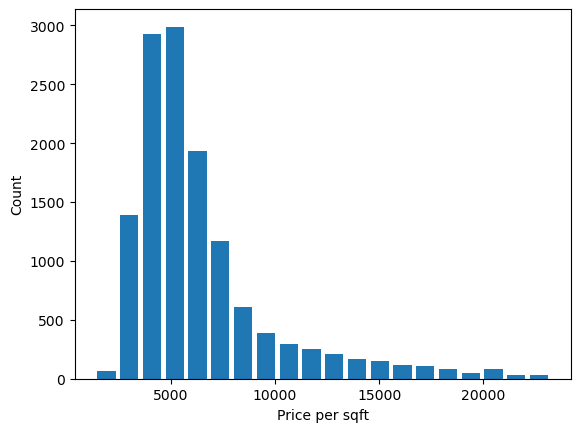

In [30]:
# plt.figure(figsize=(10,7))
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

plt.show()

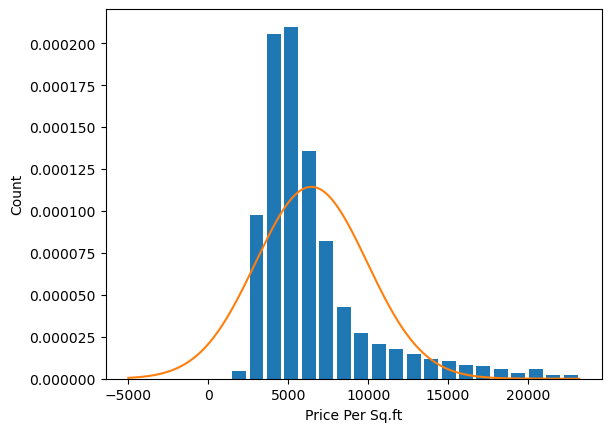

In [37]:
from scipy.stats import norm

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price Per Sq.ft')
plt.ylabel('Count')

rng = np.arange(-5000, df3['price_per_sqft'].max(), 100)
plt.plot(rng, norm.pdf(rng, df3['price_per_sqft'].mean(), df3['price_per_sqft'].std()))
plt.show();

In [47]:
df2['zscore'] = (df2['price_per_sqft'] - df2['price_per_sqft'].mean())/df2['price_per_sqft'].std()
df2

C:\Users\ikevu\AppData\Local\Temp\ipykernel_16164\3178966563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2['price_per_sqft'] - df2['price_per_sqft'].mean())/df2['price_per_sqft'].std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [50]:
df2[df2['zscore']>4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [54]:
df2['zscore'].max()

10.549415090574687

In [55]:
df2['zscore'].min()

-1.276171774503094

In [57]:
outlier = df2[(df2['zscore']>4) | (df2['zscore']<-4)]
outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [58]:
outlier.shape

(125, 8)

In [59]:
df4 = df2[(df2.zscore>-4) & (df2.zscore<4)]
df4.shape

(13047, 8)

In [60]:
df2.shape[0] - df4.shape[0]

125